In [1]:
from bezier_utils.basic import extract_bezier_curves
from bezier_utils.linearity import is_approximately_linear_by_curvature
from bezier_utils.square_approx import draw_quadrilateral_with_square, get_quadrilateral_and_square_vertices
from bezier_utils.display import plot_bezier_curve_cubic
from bezier_utils.circle_approx import process_bezier_and_circles
import numpy as np
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
from geomutils.core import mediate_points, mediate_lines, create_polygon_lines, calculate_angle, remove_elements
from geomutils.display import plot_polygon, plot_arrows_between_points
from geomutils.polygons import order_points_clockwise, build_connection_map, get_all_points, remove_finder
from matplotlib.path import Path
import matplotlib.patches as patches

In [2]:
c, looped, circle_fits = process_bezier_and_circles(extract_bezier_curves('data/problems/frag0.svg')[0])
c

Number of loops detected: 1


[array([[42.964, 70.031],
        [53.818, 82.981],
        [72.618, 71.863],
        [80.894, 95.184]]),
 array([[ 80.894,  95.184],
        [ 84.384, 105.02 ],
        [ 81.922, 122.488],
        [ 78.675, 132.286]]),
 array([[ 78.675, 132.286],
        [ 70.545, 156.818],
        [ 52.746, 144.905],
        [ 38.041, 156.835]]),
 array([[176.5  ,  67.5  ],
        [162.824,  84.239],
        [142.542,  70.7  ],
        [124.127,  82.523]]),
 array([[124.127,  82.523],
        [101.588,  96.993],
        [100.88 , 125.778],
        [119.062, 142.128]]),
 array([[119.062, 142.128],
        [132.572, 154.276],
        [154.293, 151.112],
        [165.864, 166.805]]),
 array([[ 13.245, 227.755],
        [  7.16 , 152.655],
        [  2.124,  76.843],
        [  1.5  ,   1.5  ]]),
 array([[224.647, 215.68 ],
        [188.164, 223.417],
        [151.005, 227.398],
        [113.922, 231.367]]),
 array([[113.922, 231.367],
        [103.269, 232.507],
        [ 92.589, 233.649],
        [ 81

In [3]:
circle_fits

[(107.83991031128326, 114.4098857137046, 81.80420822039325)]

In [4]:
lines = []
unprocessed_beziers = []
for curve in c:
    if is_approximately_linear_by_curvature(curve, tolerance=0.01):
        lines.append(np.array([curve[0], curve[-1]]))
    else:
        unprocessed_beziers.append(curve)
unprocessed_beziers

[array([[42.964, 70.031],
        [53.818, 82.981],
        [72.618, 71.863],
        [80.894, 95.184]]),
 array([[ 80.894,  95.184],
        [ 84.384, 105.02 ],
        [ 81.922, 122.488],
        [ 78.675, 132.286]]),
 array([[ 78.675, 132.286],
        [ 70.545, 156.818],
        [ 52.746, 144.905],
        [ 38.041, 156.835]]),
 array([[176.5  ,  67.5  ],
        [162.824,  84.239],
        [142.542,  70.7  ],
        [124.127,  82.523]]),
 array([[124.127,  82.523],
        [101.588,  96.993],
        [100.88 , 125.778],
        [119.062, 142.128]]),
 array([[119.062, 142.128],
        [132.572, 154.276],
        [154.293, 151.112],
        [165.864, 166.805]])]

In [5]:
unmediated_points = []
for line in lines:
    unmediated_points.append(line[0])
    unmediated_points.append(line[1])
mediated_points = mediate_points(unmediated_points, 0.5)
mediated_lines = mediate_lines(lines, mediated_points)
connections = build_connection_map(mediated_lines)
points = get_all_points(mediated_lines)
ordered_points = order_points_clockwise(points, connections)
remove_vertices = remove_finder(ordered_points)
remove_vertices

[(113.922, 231.36700000000002),
 (81.876, 233.579),
 (56.652, 231.91500000000002)]

In [6]:
flattened_ordered_points = remove_elements(ordered_points, remove_vertices)
flattened_polygon = create_polygon_lines(flattened_ordered_points)
square_vertices = get_quadrilateral_and_square_vertices(flattened_polygon)
square_vertices

[array([5.6649124, 3.4222874]),
 array([222.4353376,   3.4222874]),
 array([222.4353376, 220.1927126]),
 array([  5.6649124, 220.1927126])]

In [7]:
square_vertices

[array([5.6649124, 3.4222874]),
 array([222.4353376,   3.4222874]),
 array([222.4353376, 220.1927126]),
 array([  5.6649124, 220.1927126])]

In [8]:
circle_fits

[(107.83991031128326, 114.4098857137046, 81.80420822039325)]

In [9]:
unprocessed_beziers

[array([[42.964, 70.031],
        [53.818, 82.981],
        [72.618, 71.863],
        [80.894, 95.184]]),
 array([[ 80.894,  95.184],
        [ 84.384, 105.02 ],
        [ 81.922, 122.488],
        [ 78.675, 132.286]]),
 array([[ 78.675, 132.286],
        [ 70.545, 156.818],
        [ 52.746, 144.905],
        [ 38.041, 156.835]]),
 array([[176.5  ,  67.5  ],
        [162.824,  84.239],
        [142.542,  70.7  ],
        [124.127,  82.523]]),
 array([[124.127,  82.523],
        [101.588,  96.993],
        [100.88 , 125.778],
        [119.062, 142.128]]),
 array([[119.062, 142.128],
        [132.572, 154.276],
        [154.293, 151.112],
        [165.864, 166.805]])]

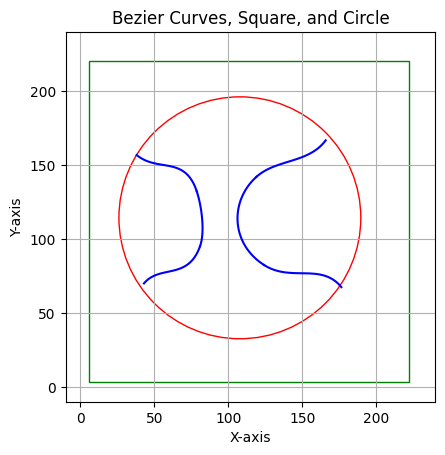

In [10]:
circle = circle_fits[0]
fig, ax = plt.subplots()
for control_points in unprocessed_beziers:
    plot_bezier_curve_cubic(ax, control_points)
square_path = Path(square_vertices + [square_vertices[0]], closed=True)
patch = patches.PathPatch(square_path, facecolor='none', edgecolor='green')
ax.add_patch(patch)
circle_patch = patches.Circle((circle[0], circle[1]), circle[2], edgecolor='red', facecolor='none')
ax.add_patch(circle_patch)
ax.set_xlim(-10, 240)
ax.set_ylim(-10, 240)
ax.set_aspect('equal', 'box')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Bezier Curves, Square, and Circle')
plt.grid(True)
plt.show()
